In [18]:
from sklearn.utils import Bunch

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.manifold import TSNE
from time import strftime, localtime
rcParams['figure.figsize'] = 10, 8

def load_resnet_feature_files(base_dir_resnet):
    test_feat_file = base_dir_resnet.format('test_feat')
    test_label_file = base_dir_resnet.format('test_label')

    train_feat_file = base_dir_resnet.format('train_feat')
    train_label_file= base_dir_resnet.format('train_label')

    valid_feat_file= base_dir_resnet.format('valid_feat')
    valid_label_file= base_dir_resnet.format('valid_label')

    test_feats = np.load(test_feat_file)
    test_labels = np.load(test_label_file)

    train_feats = np.load(train_feat_file)
    train_labels = np.load(train_label_file)

    valid_feats = np.load(valid_feat_file)
    valid_labels = np.load(valid_label_file)
    
    return Bunch(train=(train_feats, train_labels),
                 valid=(valid_feats, valid_labels),
                 test=(test_feats, test_labels))

def load_scatter_feature_files(feature_path):
    train_feats, train_labels, valid_feats, valid_labels, test_feats, test_labels = torch.load(feature_path)
    
    train_feats_flat = torch.flatten(train_feats, start_dim=1, end_dim=-1)
    train_feats_flat = np.array(train_feats_flat.cpu())
    train_labels = train_labels.cpu().data.numpy()
    valid_feats_flat = torch.flatten(valid_feats, start_dim=1, end_dim=-1)
    valid_feats_flat = np.array(valid_feats_flat.cpu())
    valid_labels = valid_labels.cpu().data.numpy()
    test_feats_flat = torch.flatten(test_feats, start_dim=1, end_dim=-1)
    test_feats_flat = np.array(test_feats_flat.cpu())
    test_labels = test_labels.cpu().data.numpy()
    

    return Bunch(train=(train_feats_flat, train_labels),
                 valid=(valid_feats_flat, valid_labels),
                 test=(test_feats_flat, test_labels))


def PCA_viz(feat, label):
    pca = PCA(n_components=2)
    pca_fitted = pca.fit_transform(feat)
    
    plt.scatter(pca_fitted[:, 0], pca_fitted[:, 1],
            c=label, edgecolor='none', alpha=0.6,
            cmap=plt.cm.get_cmap('Spectral', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();

def TSNE_viz(feat, label, name, lr=1000, ppl=30):
    model = TSNE(
            n_components=2, 
            random_state=0, 
            learning_rate =1000,
            perplexity=ppl
            )
    tsne_data = model.fit_transform(feat)

    plt.scatter(tsne_data[:, 0], tsne_data[:, 1],
            c=label, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();
#     plt.savefig('tsne_{}.pdf'.format(name))

# Feature Visualization

## 1. ResNet18_Finetune_2Layers

### Loading Data

In [20]:
base_dir_resnet = 'features/resnet18_finetune_2layers_{}.npy'
dataset = load_resnet_feature_files(base_dir_resnet)

### > Visualization using TSNE

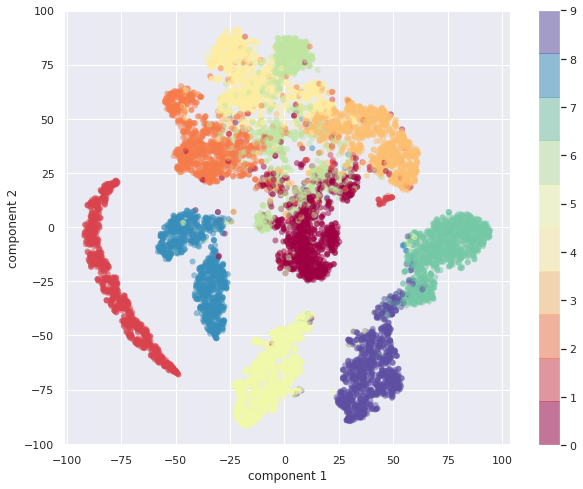

In [22]:
TSNE_viz(dataset.test[0],  dataset.test[1], "resnet_finetune_test_")

### > Visualization using PCA

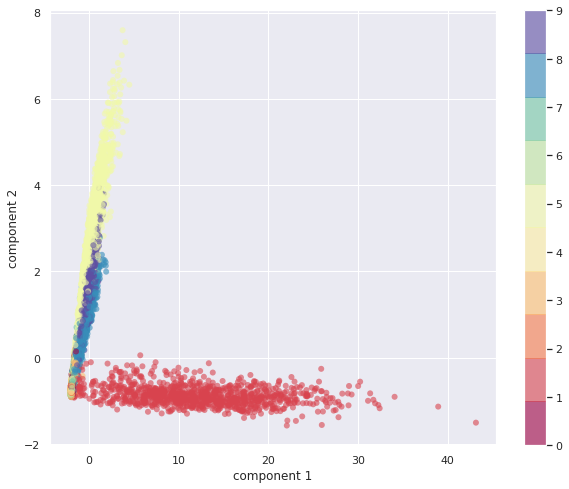

In [21]:
PCA_viz(dataset.test[0],  dataset.test[1])

## 2. Scattering (J = 1)

### Loading Data

In [24]:
dataset = load_scatter_feature_files('features/scaterring_J'+str(1)+'.pt')

### > Visualization using TSNE

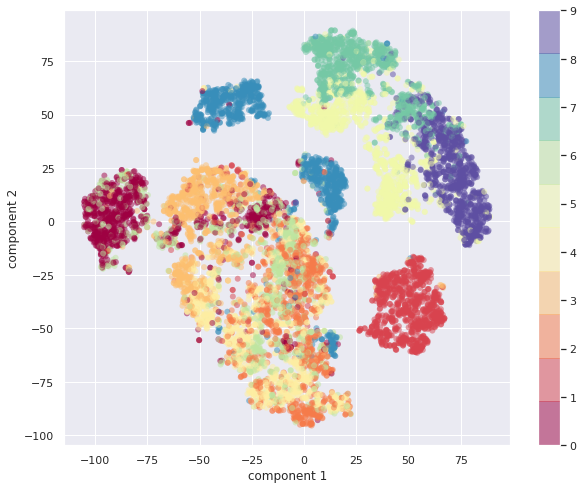

In [26]:
TSNE_viz(dataset.test[0],  dataset.test[1], "scattering_j1")

### > Visualization using PCA

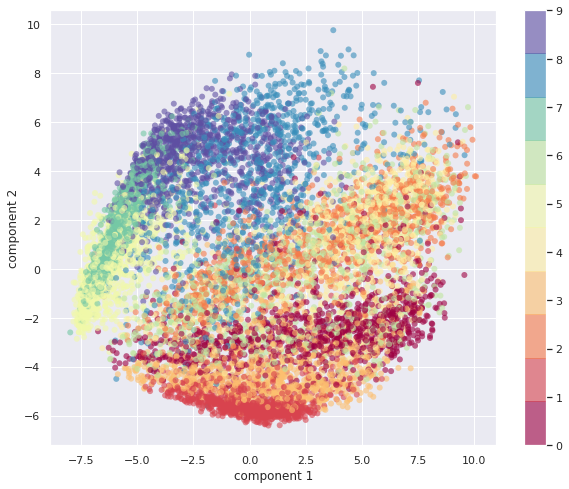

In [25]:
PCA_viz(dataset.test[0],  dataset.test[1])